In [12]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [13]:
nproc = range(1, 11)

In [14]:
def speedup(t_serial, t):
    return t_serial/t

In [15]:
def read_profiling_files():
    return

## Weak scaling

/home/martinls/.conda/envs/ShallowWaterGPU/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


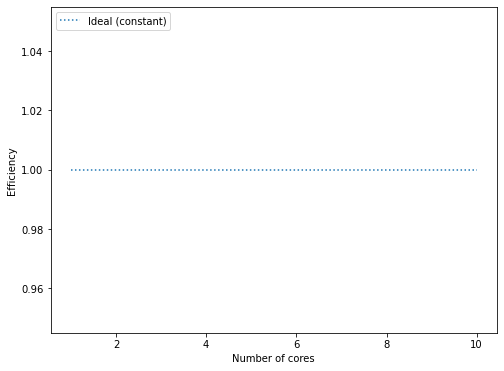

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

#ax.plot(nproc, speedup, label="Actual")

ax.plot(nproc, np.ones(len(nproc)), label="Ideal (constant)", linestyle="dotted")

ax.set_xlabel("Number of cores")
ax.set_ylabel("Efficiency")
ax.legend(loc="upper left")
fig.show()

## Strong scaling

In [17]:
def amdahls_speedup(parallel_share, nproc):
    serial_share = 1.0 - parallel_share
    return [1.0 / (serial_share + parallel_share / float(n)) for n in nproc]

In [18]:
def gustafsons_speedup(parallel_share, nproc):
    serial_share = 1.0 - parallel_share
    return [serial_share + parallel_share * float(n) for n in nproc]

/home/martinls/.conda/envs/ShallowWaterGPU/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


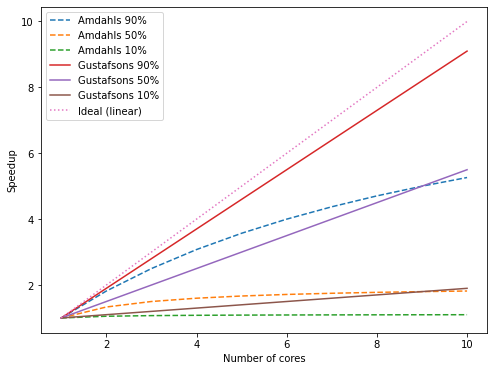

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

#ax.plot(nproc, speedup, label="Actual")

ax.plot(nproc, amdahls_speedup(0.9, nproc), label="Amdahls 90%", linestyle="dashed")
ax.plot(nproc, amdahls_speedup(0.5, nproc), label="Amdahls 50%", linestyle="dashed")
ax.plot(nproc, amdahls_speedup(0.1, nproc), label="Amdahls 10%", linestyle="dashed")

ax.plot(nproc, gustafsons_speedup(0.9, nproc), label="Gustafsons 90%")
ax.plot(nproc, gustafsons_speedup(0.5, nproc), label="Gustafsons 50%")
ax.plot(nproc, gustafsons_speedup(0.1, nproc), label="Gustafsons 10%")

ax.plot(nproc, nproc, label="Ideal (linear)", linestyle="dotted")

ax.set_xlabel("Number of cores")
ax.set_ylabel("Speedup")
ax.legend(loc="upper left")
fig.show()